In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.nan)

In [2]:
data = np.loadtxt("nr_05.44.06_1373.dat", unpack=True)
print(data[0])

[ 44.181473  43.30368   43.280651  43.048389  42.574234  42.298874  42.4077
  41.973495  42.139275  42.009396  42.132023  41.656857  41.340382
  40.874672  40.411427  40.602955  40.521595  40.44138   40.486473
  41.301163  41.946594  41.503227  41.358109  42.184814  43.247669
  43.14703   44.268623  46.002731  46.801437  47.14225   47.15279
  46.783131  46.249329  46.424618  46.492569  46.536533  46.556957
  46.752743  47.067253  47.677273  47.699303  47.753033  48.142216
  48.841949  49.489166  49.837227  49.689339  49.319775  49.76535
  49.775562  49.123386  49.31538   49.287838  49.838947  50.604465
  51.557316  52.619503  52.529819  51.596893  50.723816  50.558495
  51.144138  50.548534  50.327168  51.255447  51.467796  51.515491
  52.043991  52.190296  51.944145  51.711964  51.835243  51.968201
  51.919258  52.045609  52.407505  52.686508  51.990185  52.113541
  52.243118  51.48938   51.186371  51.309799  51.427109  51.663368
  52.22337   52.579769  51.47097   50.219624  49.374332

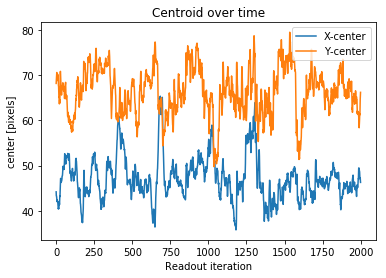

In [3]:
plt.plot (data[0], label="X-center")
plt.plot (data[1], label="Y-center")
plt.legend()
plt.title ("Centroid over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("center [pixels]")
plt.savefig (" nr_05.44.06_1373-xycentroid.png")

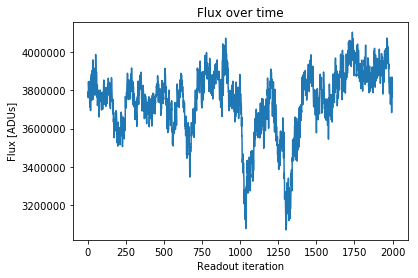

In [4]:
plt.figure()
plt.plot (data[2])
plt.title("Flux over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("Flux [ADUs]")
plt.savefig (" nr_05.44.06_1373-flux.png")

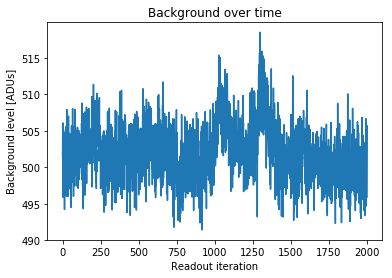

In [5]:
plt.figure()
plt.plot (data[3])
plt.title("Background over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("Background level [ADUs]")
plt.savefig (" nr_05.44.06_1373-background.png")

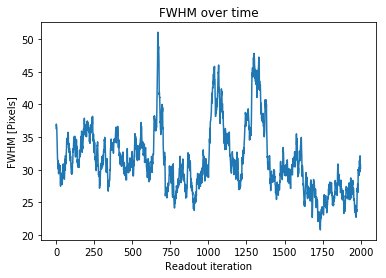

In [6]:
plt.figure()
plt.plot (data[4])
plt.title("FWHM over time")
plt.xlabel ("Readout iteration")
plt.ylabel ("FWHM [Pixels]")
plt.savefig (" nr_05.44.06_1373-fwhm.png")

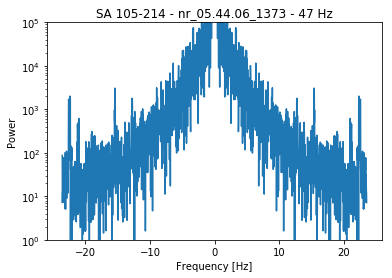

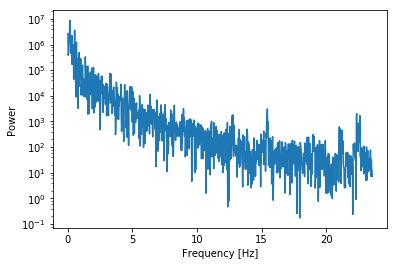

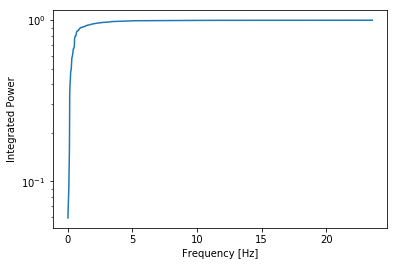

In [7]:
indata = data[0]# - np.mean (data[0])
psX = np.abs (np.fft.fft (indata))**2
time_step = 0.021196 # derive from image header of the input file; change as you use different input files!
freqs = np.fft.fftfreq (indata.size,time_step)
idx = np.argsort (freqs)

_x = freqs[idx]
_y = psX[idx]
plt.plot (_x,_y)
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.yscale('log')
plt.ylim([1,100000])
plt.title ("SA 105-214 - nr_05.44.06_1373 - 47 Hz")
plt.savefig (" nr_05.44.06_1373-powerspectrum.png")

plt.figure()

_cx = freqs[freqs>0]
_cy = psX[freqs>0]

_cy_cum = np.cumsum (_cy)
_cy_cum /= _cy_cum[-1]

plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Power")
plt.plot (_cx, _cy)
plt.savefig (" nr_05.44.06_1373-power.png")


plt.figure()
plt.plot (_cx, _cy_cum)
plt.yscale('log')
plt.xlabel ("Frequency [Hz]")
plt.ylabel ("Integrated Power")
plt.savefig (" nr_05.44.06_1373-integratedpower.png")